<a href="https://colab.research.google.com/github/manisa504/ciss09/blob/main/Chapter2_Data_and_sampling_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving players.csv to players.csv


In [3]:
players_data_import = pd.read_csv("players.csv")
players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [10]:
players_data_import["height_inches"] = players_data_import["height"] .apply(lambda x : int(x.split("-")[0]) * 12 + int(x.split("-")[1]) if len(x.split("-")) == 2 else int(x))

In [11]:
players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


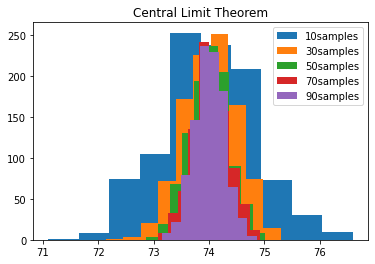

In [15]:
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
  samples = []
  for i in range(1000):
    samples.append(players_data_import["height_inches"].sample(x).mean())
  plt.hist(samples)
  plt.legend([str(z) + "samples" for z in sample_amounts])
  plt.title("Central Limit Theorem")

In [16]:
players_data_import["height_inches"].sem()

0.05065243293253027

In [25]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
  sample = resample(players_data_import["height_inches"])
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap statistics:')
print(f'original:{players_data_import["height_inches"].median()}')
print(f'bias: {results.median() - players_data_import["height_inches"].median()}')
print(f'std.error: {results.std()}')

Bootstrap statistics:
original:74.0
bias: 0.0
std.error: 0.0


In [22]:
sample

19      77
1432    74
1760    75
1402    70
218     72
        ..
2278    77
2227    74
1543    79
2650    70
735     71
Name: height_inches, Length: 2732, dtype: int64

In [23]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
  sample = resample(players_data_import["height_inches"])
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap statistics:')
print(f'original:{players_data_import["height_inches"].mean()}')
print(f'bias: {results.mean() - players_data_import["height_inches"].mean()}')
print(f'std.error: {results.std()}')

Bootstrap statistics:
original:74.0106149341142
bias: -0.010614934114201446
std.error: 0.0


In [27]:
import numpy as np
import scipy.stats as st

#define sample data 
data = players_data_import["height_inches"][:20]

#creat 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(71.6396036490789, 74.26039635092111)

In [28]:
import numpy as np
import scipy.stats as st

#define sample data
np.random.seed(0)
data = players_data_import["height_inches"][:1500]

#creat 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(73.95571117612432, 74.22295549054233)

((array([-3.31270533, -3.05604344, -2.91334469, ...,  2.91334469,
          3.05604344,  3.31270533]), array([66, 66, 66, ..., 81, 81, 81])),
 (2.61541437591282, 74.066, 0.9915108386963379))

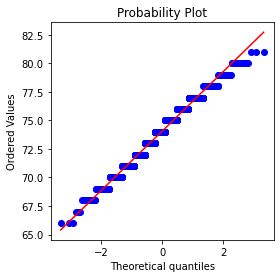

In [30]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = players_data_import["height_inches"].sample(1500)
stats.probplot(norm_sample, plot=ax)